In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier # Use pre-built tree from sklearn
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

### Understand Residual Optimization

In [2]:
# Define data for each row as a list of lists
data = [
    [ 1.6, 'Blue', 'Male', 88 ],
    [ 1.6, 'Green', 'Female', 76 ],
    [ 1.5, 'Blue', 'Female', 56 ],
    [ 1.8, 'Red', 'Male', 73 ],
    [ 1.5, 'Green', 'Male', 77 ],
    [ 1.4, 'Blue', 'Male', 57 ],
]

# Define the column names
columns = ['height', 'favorite_color', 'gender', 'weight']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

df.sample(5)

,height,favorite_color,gender,weight
5,1.4,Blue,Male,57
3,1.8,Red,Male,73
2,1.5,Blue,Female,56
4,1.5,Green,Male,77
0,1.6,Blue,Male,88


In [3]:
# Best initial prediction of data is average value
initial_guess = df['weight'].mean()
initial_guess

np.float64(71.16666666666667)

In [4]:
def compute_residual_front_inital_guess(row,initial_guess):
  # calculate the residual here and return the row
  row['initial_prediction'] = initial_guess
  row['residual'] = row.weight - initial_guess # Gradient of prediction
  return row

df = df.apply(compute_residual_front_inital_guess, axis=1, initial_guess=initial_guess)
df.sample(5)

,height,favorite_color,gender,weight,initial_prediction,residual
2,1.5,Blue,Female,56,71.166667,-15.166667
0,1.6,Blue,Male,88,71.166667,16.833333
3,1.8,Red,Male,73,71.166667,1.833333
5,1.4,Blue,Male,57,71.166667,-14.166667
4,1.5,Green,Male,77,71.166667,5.833333


In [5]:
# Define a small tree
model = DecisionTreeRegressor(max_leaf_nodes=4)

In [6]:
# Handle Categorical data by creating dummies data
df_encoded = pd.get_dummies(df, columns=['favorite_color', 'gender'])
df_encoded.sample(5)

,height,weight,initial_prediction,residual,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
5,1.4,57,71.166667,-14.166667,True,False,False,False,True
4,1.5,77,71.166667,5.833333,False,True,False,False,True
0,1.6,88,71.166667,16.833333,True,False,False,False,True
3,1.8,73,71.166667,1.833333,False,False,True,False,True
2,1.5,56,71.166667,-15.166667,True,False,False,True,False


In [7]:
X_train = df_encoded.drop(['weight', 'residual','initial_prediction'], axis=1)
y_train = df[['residual']]

X_train.sample(5)

,height,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
1,1.6,False,True,False,True,False
4,1.5,False,True,False,False,True
0,1.6,True,False,False,False,True
3,1.8,False,False,True,False,True
2,1.5,True,False,False,True,False


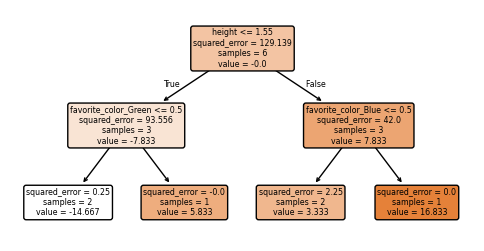

In [8]:
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(6, 3))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

In [9]:
df['tree_1'] = model.predict(X_train)*0.1
df['current_prediction'] =  df['tree_1'] +  df['initial_prediction'] # Update prediction with Learning rate
df.sample(5)

,height,favorite_color,gender,weight,initial_prediction,residual,tree_1,current_prediction
1,1.6,Green,Female,76,71.166667,4.833333,0.333333,71.50
4,1.5,Green,Male,77,71.166667,5.833333,0.583333,71.75
5,1.4,Blue,Male,57,71.166667,-14.166667,-1.466667,69.70
3,1.8,Red,Male,73,71.166667,1.833333,0.333333,71.50
0,1.6,Blue,Male,88,71.166667,16.833333,1.683333,72.85


In [10]:
df['residual'] =  df['weight'] - df['current_prediction']
y_train = df[['residual']] # Update and predict new residual
df.sample(5)

,height,favorite_color,gender,weight,initial_prediction,residual,tree_1,current_prediction
4,1.5,Green,Male,77,71.166667,5.25,0.583333,71.75
5,1.4,Blue,Male,57,71.166667,-12.70,-1.466667,69.70
1,1.6,Green,Female,76,71.166667,4.50,0.333333,71.50
2,1.5,Blue,Female,56,71.166667,-13.70,-1.466667,69.70
3,1.8,Red,Male,73,71.166667,1.50,0.333333,71.50


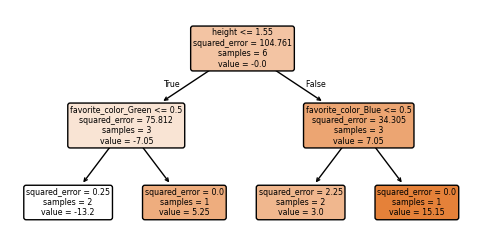

In [11]:
# Train a small tree with new data
model.fit(X_train , y_train)
plt.figure(figsize=(6, 3))
plot_tree(model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

In [12]:
df['tree_2'] = model.predict(X_train)*0.1
df['current_prediction'] =  df['tree_1'] +  df['initial_prediction'] + df['tree_2']
df.sample(5)

,height,favorite_color,gender,weight,initial_prediction,residual,tree_1,current_prediction,tree_2
5,1.4,Blue,Male,57,71.166667,-12.70,-1.466667,68.380,-1.320
4,1.5,Green,Male,77,71.166667,5.25,0.583333,72.275,0.525
3,1.8,Red,Male,73,71.166667,1.50,0.333333,71.800,0.300
1,1.6,Green,Female,76,71.166667,4.50,0.333333,71.800,0.300
0,1.6,Blue,Male,88,71.166667,15.15,1.683333,74.365,1.515


In [13]:
def cal_stump3_and_update_prediction(df):
  df['residual'] = df['weight'] - df['current_prediction']
  y_train = df[['residual']]
  model.fit(X_train, y_train)
  df['tree_3'] = model.predict(X_train)*0.1
  df['current_prediction'] = df['initial_prediction'] + df['tree_1'] + df['tree_2'] + df['tree_3']
  df['residual'] = df['weight'] - df['current_prediction']

  return df

# Seeing that current prediction is slightly better than initial prediction after 3 iterations
df = cal_stump3_and_update_prediction(df)
df.sample(5)

,height,favorite_color,gender,weight,initial_prediction,residual,tree_1,current_prediction,tree_2,tree_3
3,1.8,Red,Male,73,71.166667,0.9300,0.333333,72.0700,0.300,0.2700
1,1.6,Green,Female,76,71.166667,3.9300,0.333333,72.0700,0.300,0.2700
4,1.5,Green,Male,77,71.166667,4.2525,0.583333,72.7475,0.525,0.4725
0,1.6,Blue,Male,88,71.166667,12.2715,1.683333,75.7285,1.515,1.3635
5,1.4,Blue,Male,57,71.166667,-10.1920,-1.466667,67.1920,-1.320,-1.1880


### Gradient Boosting function

In [14]:
# Define data for each row as a list of lists
data = [
    [ 1.6, 'Blue', 'Male', 88 ],
    [ 1.6, 'Green', 'Female', 76 ],
    [ 1.5, 'Blue', 'Female', 56 ],
    [ 1.8, 'Red', 'Male', 73 ],
    [ 1.5, 'Green', 'Male', 77 ],
    [ 1.4, 'Blue', 'Male', 57 ],
]

# Define the column names
columns = ['height', 'favorite_color', 'gender', 'weight']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

df.head()

,height,favorite_color,gender,weight
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77


In [15]:
df_encoded = pd.get_dummies(df, columns=['favorite_color', 'gender'])
df_encoded.head()

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male
0,1.6,88,True,False,False,False,True
1,1.6,76,False,True,False,True,False
2,1.5,56,True,False,False,True,False
3,1.8,73,False,False,True,False,True
4,1.5,77,False,True,False,False,True


In [16]:
df_train = df_encoded.copy()

In [17]:
def initialize_prediction(df, target):
  # calculate the initial prediction value and reutrn a df with columns 'current_prediction' and 'residual'
  initial_prediction = df[target].mean()

  def add_residual(row, initial_guess):
    row['current_prediction'] = initial_guess
    row['residual'] = row[target] - initial_guess
    return row

  newdf = df.apply(add_residual, axis=1, initial_guess=initial_prediction)
  return newdf, initial_prediction

df_train, initial_prediction = initialize_prediction(df_train, 'weight')

df_train.head()

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male,current_prediction,residual
0,1.6,88,True,False,False,False,True,71.166667,16.833333
1,1.6,76,False,True,False,True,False,71.166667,4.833333
2,1.5,56,True,False,False,True,False,71.166667,-15.166667
3,1.8,73,False,False,True,False,True,71.166667,1.833333
4,1.5,77,False,True,False,False,True,71.166667,5.833333


In [18]:
def next_tree_prediction(df, target, max_leaf_nodes, learning_rate):
  # Train the next decsion tree. Update the 'current_prediction' and the 'residual'.
  tree = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
  X_train = df.drop([target, 'residual','current_prediction'], axis=1)
  y_train = df[['residual']]
  tree.fit(X_train, y_train)

  df['current_prediction'] = df['current_prediction'] + tree.predict(X_train)*learning_rate
  df['residual'] = df[target] - df['current_prediction']

  return df, tree

df_train, tree = next_tree_prediction( df_train, 'weight', 4, 0.1 )
df_train.head()

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male,current_prediction,residual
0,1.6,88,True,False,False,False,True,72.85,15.15
1,1.6,76,False,True,False,True,False,71.50,4.50
2,1.5,56,True,False,False,True,False,69.70,-13.70
3,1.8,73,False,False,True,False,True,71.50,1.50
4,1.5,77,False,True,False,False,True,71.75,5.25


In [19]:
def run_gradient_boost_regression(df, target, string_categorical_columns, max_leaf_nodes, learning_rate, iterations):
  df_encoded = pd.get_dummies(df, columns=string_categorical_columns)
  df_train = df_encoded.copy()

  tree_list = []
  df, initial_prediction = initialize_prediction(df_train, target)

  for i in range(iterations):
    df, tree = next_tree_prediction(df, target, max_leaf_nodes, learning_rate)
    tree_list.append(tree)

  return df, initial_prediction, tree_list

df_train = df.copy()
df_train, initial_predictition, tree_list = run_gradient_boost_regression(df_train, 'weight', ['favorite_color', 'gender'] , 4 , 0.1, 10)
df_train.head()

,height,weight,favorite_color_Blue,favorite_color_Green,favorite_color_Red,gender_Female,gender_Male,current_prediction,residual
0,1.6,88,True,False,False,False,True,82.130580,5.869420
1,1.6,76,False,True,False,True,False,73.337739,2.662261
2,1.5,56,True,False,False,True,False,61.613950,-5.613950
3,1.8,73,False,False,True,False,True,73.337739,-0.337739
4,1.5,77,False,True,False,False,True,74.966042,2.033958


In [20]:
def run_gradient_boost_regression_predicition_with_x_train(df, target, initial_prediction, tree_list, learning_rate):
  X_train = df.drop(columns=[target, 'current_prediction', 'residual'])
  prediction = initial_prediction

  for tree in tree_list:
    prediction += tree.predict(X_train)*learning_rate

  return prediction

def run_gradient_boost_regression_predicition_with_x_test(df, target, initial_prediction, tree_list, learning_rate):
  X_test = df.drop(columns=[target])
  prediction = initial_prediction

  for tree in tree_list:
    prediction += tree.predict(X_test)*learning_rate

  return prediction

In [21]:
run_gradient_boost_regression_predicition_with_x_train(df_train, 'weight', initial_prediction, tree_list, 0.1)

array([82.13057959, 73.33773853, 61.61395045, 73.33773853, 74.96604243,
       61.61395045])

### Test with real dataset

In [23]:
df = pd.read_csv('insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
879,37,female,29.50,2,no,southwest,6311.95200
793,53,male,20.90,0,yes,southeast,21195.81800
112,37,male,30.80,0,no,southwest,4646.75900
242,55,female,26.80,1,no,southwest,35160.13457
292,25,male,45.54,2,yes,southeast,42112.23560


In [24]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_train, df_test = train_test_split( df_encoded, test_size=0.3, random_state=42)

In [25]:
import matplotlib.pyplot as plt

def plot_result(x, y1, y2, y1_label, y2_label):
  plt.plot(x, y1, label=y1_label, color='blue')
  plt.plot(x, y2, label=y2_label, color='red')

  plt.title('Line Plot with Two Lines')

  plt.xlabel('x axis')
  plt.ylabel('y axis')

  plt.legend()
  plt.show()

In [27]:
def run_gradient_boost_regression_train_test(df_train, df_test, target, max_leaf_nodes, learning_rate, iterations):
  x_axis = [i for i in range(1, 101)]
  train_loss = []
  test_loss = []

  tree_list = []

  df_train, initial_prediction = initialize_prediction(df_train, target)

  for i in range(iterations):
    df_train, tree = next_tree_prediction(df_train, target, max_leaf_nodes, learning_rate)
    tree_list.append(tree)
    train_pred = df_train['current_prediction']
    test_pred = run_gradient_boost_regression_predicition_with_x_test(df_test, target, initial_prediction, tree_list, learning_rate)
    train_loss.append(((df_train['charges'].to_numpy() - train_pred)**2 ).mean())
    test_loss.append(((df_test['charges'].to_numpy() - test_pred)**2 ).mean())

  plot_result(x_axis, train_loss, test_loss, 'train_mse', 'test_mse')

  return df_train, initial_prediction, tree_list

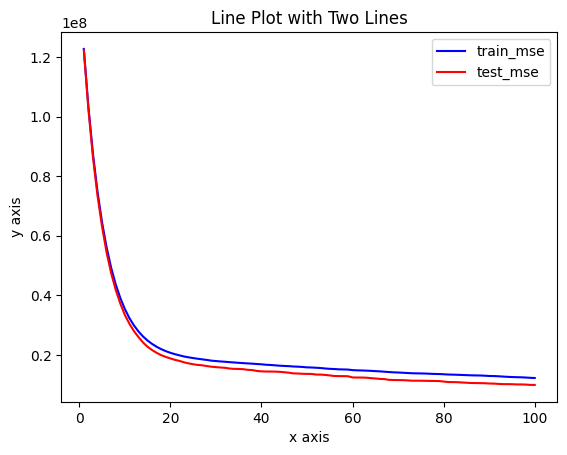

In [28]:
df_train, initial_predictition, tree_list = run_gradient_boost_regression_train_test(df_encoded, df_test, 'charges' , 8 , 0.1, 100)